# Evaluate a model

## Use score method

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [2]:
# The highest value for the score is 1.0, which indicates perfect accuracy
score = clf.score(X_train, y_train)
print(f"Training accuracy: {score}")
# Evaluate the model on the test data
score = clf.score(X_test, y_test)
print(f"Model accuracy: {score}")

Training accuracy: 1.0
Model accuracy: 0.8360655737704918


In [3]:
# Let's use the `score()` on our regression problem
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the model on the training data
reg.fit(X_train, y_train)
# Evaluate the model on the test data
score = reg.score(X_test, y_test)
print(f"Model accuracy (regression): {score}")

Model accuracy (regression): 0.5300502155172415


## Use scoring parameter

![cross-validation](../images/cross-validation.png)
  

In [4]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation upon random forest classifier
# We use None as scoring paramter as default, and the default scoring paramter for classifier is mean accuracy
cv_scores = cross_val_score(clf, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.81967213 0.8852459  0.83606557 0.85       0.8       ]
Mean cross-validation score: 0.8381967213114756


In [5]:
# Use specific scoring parameter to specify the metric
cv_scores = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy score: {cv_scores.mean()}")

Cross-validation accuracy scores: [0.81967213 0.8852459  0.83606557 0.85       0.8       ]
Mean cross-validation accuracy score: 0.8381967213114756


### Classification model evalution metrics
   
1. Accuracy
2. Area under Roc curve
3. Confusion matrix
4. Classification report

#### Accuracy

In [6]:
cv_scores = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy score: {cv_scores.mean():.2f}%")

Cross-validation accuracy scores: [0.81967213 0.8852459  0.83606557 0.85       0.8       ]
Mean cross-validation accuracy score: 0.84%


#### Area under the receiver operating characteristic curve (AUC/ROC)

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr)

* True positive = model predicts 1  when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [7]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_proba = clf.predict_proba(X_test)
# Print the predicted probabilities
print("Predicted probabilities for the all classes:\n", y_proba[:10])
print("Number of all classes predictions:", len(y_proba))

Predicted probabilities for the all classes:
 [[0.95 0.05]
 [0.38 0.62]
 [0.45 0.55]
 [0.86 0.14]
 [0.21 0.79]
 [0.16 0.84]
 [0.36 0.64]
 [0.95 0.05]
 [0.96 0.04]
 [0.53 0.47]]
Number of all classes predictions: 61


In [8]:
y_proba_positive = y_proba[:, 1]  # Get the probabilities for the positive class
print("Predicted probabilities for the positive class:\n", y_proba_positive)
print("Number of positive class predictions:", len(y_proba_positive))

Predicted probabilities for the positive class:
 [0.05 0.62 0.55 0.14 0.79 0.84 0.64 0.05 0.04 0.47 0.81 0.36 0.93 0.13
 0.96 0.97 0.99 0.08 0.02 0.06 0.46 0.1  0.65 0.77 0.65 0.66 0.79 0.7
 0.1  0.88 0.09 0.09 0.03 0.33 0.53 0.19 0.59 0.78 0.59 0.87 0.81 0.74
 0.84 0.66 0.71 0.24 0.55 0.99 0.16 0.06 0.35 0.19 0.85 0.66 0.24 0.1
 0.41 0.94 0.14 0.   0.19]
Number of positive class predictions: 61


In [9]:
# Calculate the fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba_positive)
# Print the false positive rate, true positive rate, and thresholds
print("False Positive Rate (FPR):", fpr)
print("True Positive Rate (TPR):", tpr)
print("Thresholds:", thresholds)

False Positive Rate (FPR): [0.         0.         0.         0.         0.03448276 0.03448276
 0.06896552 0.10344828 0.10344828 0.13793103 0.13793103 0.17241379
 0.17241379 0.20689655 0.20689655 0.24137931 0.24137931 0.31034483
 0.4137931  0.44827586 0.51724138 0.55172414 0.65517241 0.68965517
 0.72413793 0.86206897 1.        ]
True Positive Rate (TPR): [0.      0.0625  0.28125 0.40625 0.4375  0.59375 0.65625 0.6875  0.71875
 0.71875 0.78125 0.8125  0.90625 0.90625 0.9375  0.9375  0.96875 0.96875
 0.96875 0.96875 0.96875 0.96875 0.96875 1.      1.      1.      1.     ]
Thresholds: [ inf 0.99 0.85 0.81 0.79 0.7  0.66 0.65 0.64 0.62 0.59 0.55 0.46 0.41
 0.36 0.35 0.33 0.24 0.19 0.16 0.14 0.13 0.1  0.09 0.08 0.05 0.  ]


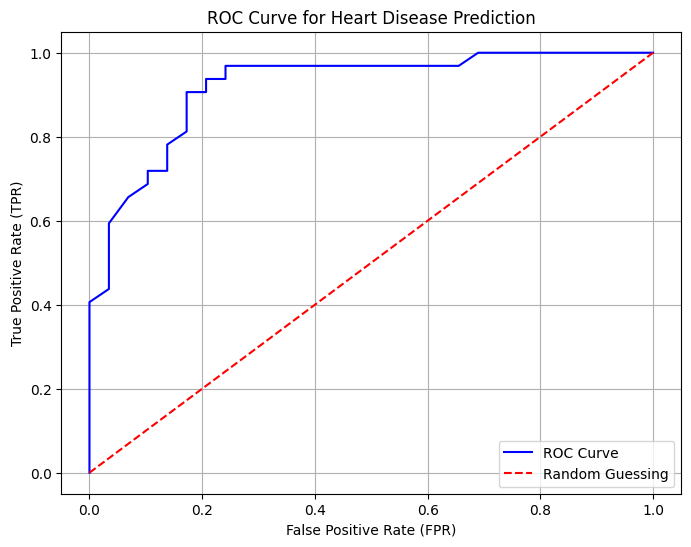

In [10]:
# Create a function to plot the ROC curve
%matplotlib inline
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, title="ROC Curve"):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC Curve')
    # Plotting the diagonal line for random guessing with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()
# Plot the ROC curve
plot_roc_curve(fpr, tpr, title="ROC Curve for Heart Disease Prediction")

In [11]:
from sklearn.metrics import roc_auc_score
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba_positive)
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 0.92


** What does ROC AUC score mean?**
The ROC AUC score is a measure of the model's ability to distinguish between classes.

A score of 0.5 indicates no discrimination (random guessing), while a score of 1.0 indicates perfect discrimination.

A score above 0.7 is generally considered good, and above 0.8 is considered excellent.

In this case, a ROC AUC score of 0.92 indicates that the model has a good ability to distinguish between patients with and without heart disease.

In a nutshell, what you should remember is:

* ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

* The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

* The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.


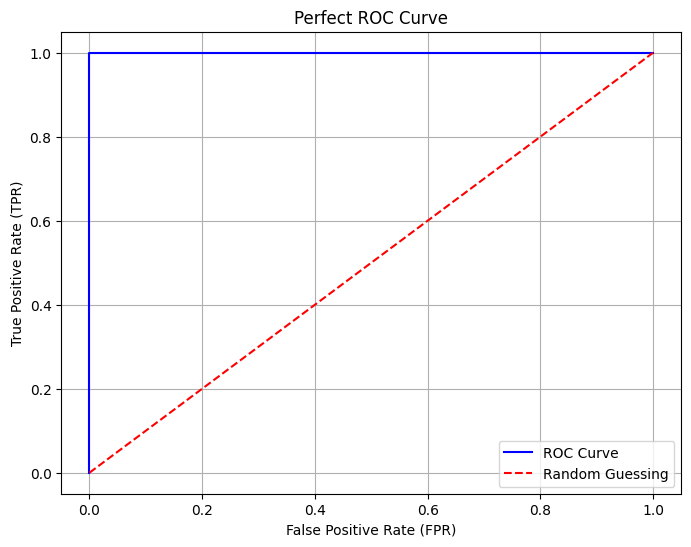

Perfect ROC AUC Score: 1.00


In [12]:
# Plot perfect Roc curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr, title="Perfect ROC Curve")
roc_auc_perfect = roc_auc_score(y_test, y_test)
print(f"Perfect ROC AUC Score: {roc_auc_perfect:.2f}")

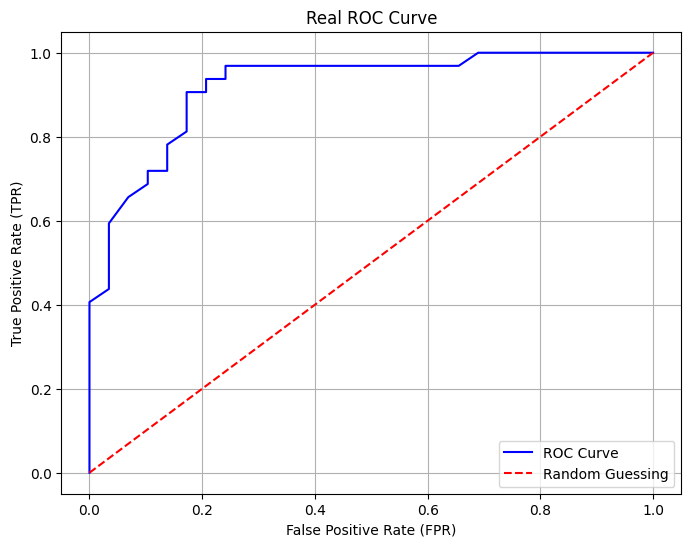

Real ROC AUC Score: 0.92


In [13]:
# Plot the real Roc curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba_positive)
plot_roc_curve(fpr, tpr, title="Real ROC Curve")
roc_auc_real = roc_auc_score(y_test, y_proba_positive)
print(f"Real ROC AUC Score: {roc_auc_real:.2f}")

#### Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual lables 
it was supposed to predict.

In essence, it gives you an idea of where the model is getting confused.

In [14]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_preds)
# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[24  5]
 [ 5 27]]


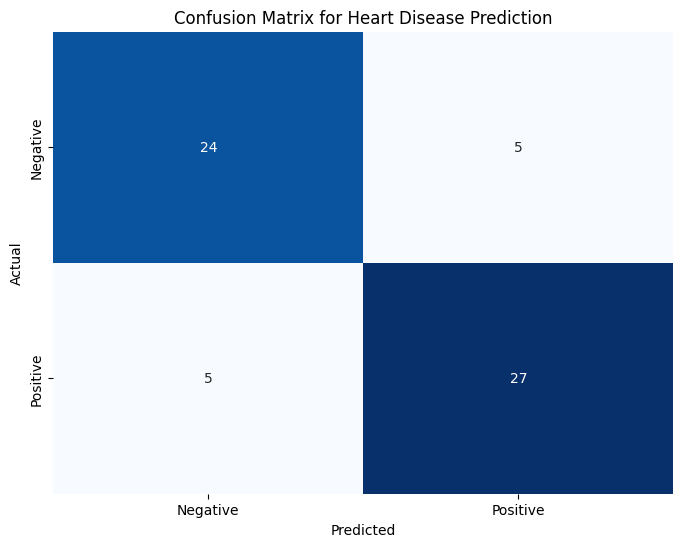

In [15]:
# Visualize the confusion matrix
import seaborn as sns
def plot_confusion_matrix(conf_matrix, title="Confusion Matrix"):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()
# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, title="Confusion Matrix for Heart Disease Prediction")

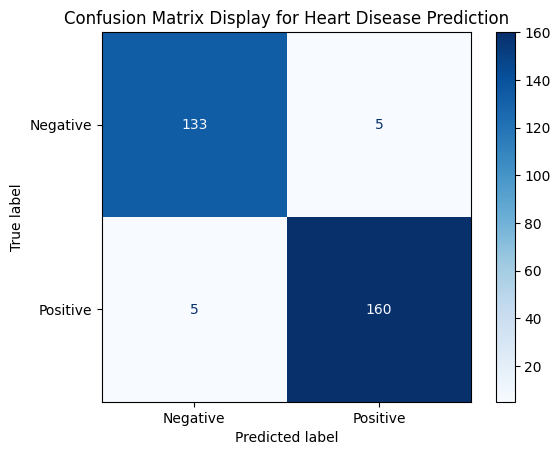

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
# Create a confusion matrix display
disp = ConfusionMatrixDisplay.from_estimator(clf, X, y,
                                              display_labels=['Negative', 'Positive'],
                                              cmap=plt.cm.Blues,
                                              normalize=None)
disp.ax_.set_title("Confusion Matrix Display for Heart Disease Prediction")
# Show the confusion matrix display
plt.show()

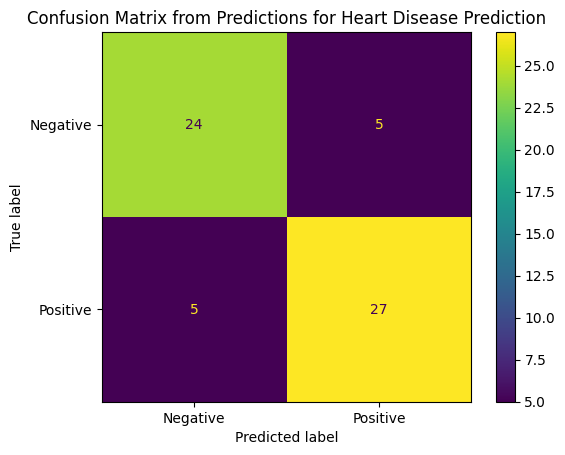

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds,
                                        display_labels=['Negative', 'Positive'],
                                        normalize=None)
plt.title("Confusion Matrix from Predictions for Heart Disease Prediction")
plt.show()

#### Classification Report

In [18]:
from sklearn.metrics import classification_report
# Generate a classification report
class_report = classification_report(y_test, y_preds, target_names=['Negative', 'Positive'])
# Print the classification report
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

    Negative       0.83      0.83      0.83        29
    Positive       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [19]:
# Where precission and recall become valuable
# Precision: The proportion of positive predictions that are actually positive.
# Recall: The proportion of actual positives that are correctly predicted.
# F1 Score: The harmonic mean of precision and recall, providing a balance between the two
import numpy as np
diseasse_true = np.zeros(10000)
diseasse_true[0] = 1 # Only one positive case
diseasse_pred = np.zeros(10000)

pd.DataFrame(classification_report(diseasse_true, diseasse_pred, output_dict=True, zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


*** Summarize Classification Model Evaluation Metrics/Techniques ***

- Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

- Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

- Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

- F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

- Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

- Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

- Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

- ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

- Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

Which classification metric should you use?

- Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

- Precision and recall become more important when classes are imbalanced.

- If false-positive predictions are worse than false-negatives, aim for higher precision.

- If false-negative predictions are worse than false-positives, aim for higher recall.

- F1-score is a combination of precision and recall.

- A confusion matrix is always a good way to visualize how a classification model is going.

### Regression model evalution metrics

* R^2 (pronounced r-squared) or coefficient of determination
* Mean absolute error (MAE)
* Mean squared error (MSE)

In [20]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
# Fetch the California housing dataset
housing = fetch_california_housing()
# Create a DataFrame from the housing data
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
# Add the target variable to the DataFrame
housing_df['target'] = housing.target
# Display the first few rows of the DataFrame
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X = housing_df.drop("target", axis=1)
y = housing_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
y_test.mean()

np.float64(2.0550030959302323)

#### R^2
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). In the general case when the true y is non-constant, a constant model that always predicts the average y disregarding the input features would get a score of 0.0.

In [23]:
from sklearn.metrics import r2_score
# Fill an array with the mean of y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:10]  # Display the first 10 values

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [24]:
r2_score_value = r2_score(y_test, y_test_mean)
print(f"R^2 score of the mean prediction: {r2_score_value:.4f}")

R^2 score of the mean prediction: 0.0000


In [25]:
r2_score_value = r2_score(y_test, y_test)
print(f"R^2 score of the actual data: {r2_score_value:.4f}")

R^2 score of the actual data: 1.0000


In [26]:
# Train a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Mean absolute error (MAE)
MAE is the average of the absolute differences between predictions and the actual values.

It gives you an idea of how wrong your models predictions are.

In [27]:
from sklearn.metrics import mean_absolute_error

y_preds = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 0.3275


In [28]:
df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_preds
})
df["Difference"] = df["Predicted"] - df["Actual"]
df.head(10)

,Actual,Predicted,Difference
20046,0.47700,0.509500,0.032500
3024,0.45800,0.741610,0.283610
15663,5.00001,4.923257,-0.076753
20484,2.18600,2.529610,0.343610
9814,2.78000,2.273690,-0.506310
13311,1.58700,1.646920,0.059920
7113,1.98200,2.376050,0.394050
7668,1.57500,1.669320,0.094320
18246,3.40000,2.772971,-0.627029
5723,4.46600,4.913459,0.447459


In [29]:
# MAE using formulas and differences
np.abs(df["Difference"]).mean()

np.float64(0.32754256845930246)

#### Mean squared error (MSE)
MSE is the mean of the square of the errors between predictions and the actual values.

In [30]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 0.2554


In [31]:
df["Squared Difference"] = df["Difference"] ** 2
df.head(10)

,Actual,Predicted,Difference,Squared Difference
20046,0.47700,0.509500,0.032500,0.001056
3024,0.45800,0.741610,0.283610,0.080435
15663,5.00001,4.923257,-0.076753,0.005891
20484,2.18600,2.529610,0.343610,0.118068
9814,2.78000,2.273690,-0.506310,0.256350
13311,1.58700,1.646920,0.059920,0.003590
7113,1.98200,2.376050,0.394050,0.155275
7668,1.57500,1.669320,0.094320,0.008896
18246,3.40000,2.772971,-0.627029,0.393166
5723,4.46600,4.913459,0.447459,0.200219


*** Summarize Regression Model Evaluation Metrics/Techniques ***

- R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

- Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

- Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Which regression metric should you use?

- R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

- MAE gives a better indication of how far off each of your model's predictions are on average.

- As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

  - Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.

  - Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off.

### Finally using the scoring parameter

#### Apply on classfication problem

In [32]:
cv_val = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"Cross-validation scores: {cv_val}")
print(f"Mean cross-validation score: {cv_val.mean()*100:.2f}%")

# Perform cross-validation with precision and recall
cv_val_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"Cross-validation precision scores: {cv_val_precision}")
print(f"Mean cross-validation precision score: {cv_val_precision.mean()*100:.2f}%")
cv_val_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
print(f"Cross-validation recall scores: {cv_val_recall}")
print(f"Mean cross-validation recall score: {cv_val_recall.mean()*100:.2f}%")


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/annz/Study/Study/ML/ztm-ai/myvenv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/annz/Study/Study/ML/ztm-ai/myvenv/lib/python3.13/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/annz/Study/Study/ML/ztm-ai/myvenv/lib/python3.13/site-packages/sklearn/ensemble/_forest.py", line 419, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
                               ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^
  File "/Users/annz/Study/Study/ML/ztm-ai/myvenv/lib/python3.13/site-packages/sklearn/ensemble/_forest.py", line 831, in _validate_y_class_weight
    check_classification_targets(y)
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^
  File "/Users/annz/Study/Study/ML/ztm-ai/myvenv/lib/python3.13/site-packages/sklearn/utils/multiclass.py", line 222, in check_classification_targets
    raise ValueError(
    ...<3 lines>...
    )
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


#### Apply on regression problem

In [ ]:
# Perform cross-validation with r2 score
cv_val_r2 = cross_val_score(regressor, X, y, cv=3, scoring=None)
print(f"Cross-validation R^2 scores: {cv_val_r2}")
print(f"Mean cross-validation R^2 score: {cv_val_r2.mean():.4f}")
print(f"Cross-validation R^2 score: {cv_val_r2.mean()*100:.2f}%")

Cross-validation R^2 scores: [0.         0.33395021 0.        ]
Mean cross-validation R^2 score: 0.1113
Cross-validation R^2 score: 11.13%


In [ ]:
# neg_mean_squared_error the closer to zero the better
cv_val = cross_val_score(regressor, X, y, cv=3, scoring="neg_mean_squared_error")
mse_cv = -cv_val.mean()
print(f"Cross-validated Mean Squared Error (MSE): {mse_cv:.4f}")
print(f"Cross-validated Root Mean Squared Error (RMSE): {np.sqrt(mse_cv):.4f}")
print(f"Cross-validation scores: {cv_val}")
print(f"Mean cross-validation score: {cv_val.mean():.2f}")

Cross-validated Mean Squared Error (MSE): 0.2326
Cross-validated Root Mean Squared Error (RMSE): 0.4823
Cross-validation scores: [-0.21553564 -0.15461287 -0.32754752]
Mean cross-validation score: -0.23


In [ ]:
# Perform cross-validation with neg mean absolute error
# Closer to zero the better 
cv_val_mae = cross_val_score(regressor, X, y, cv=3, scoring="neg_mean_absolute_error")
mae_cv = -cv_val_mae.mean()
print(f"Cross-validated Mean Absolute Error (MAE): {mae_cv:.4f}")
print(f"Cross-validation MAE scores: {cv_val_mae}") 

Cross-validated Mean Absolute Error (MAE): 0.3859
Cross-validation MAE scores: [-0.40188119 -0.2709901  -0.48485149]


## Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to use the `sklearn.metrics`

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [70]:
# Create X and y for classification
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model on the training data
clf.fit(X_train, y_train)
# Make predictions on the test set
y_preds = clf.predict(X_test)
# Evaluate the model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.4f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 83.6066%
Precision: 0.84375
Recall: 0.84375
F1: 0.84375


In [71]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the model on the training data
reg.fit(X_train, y_train)
# Make predictions on the test set
y_preds = reg.predict(X_test)
# Evaluate the model using evaluation functions
print("Regressor metrics on the test set")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_preds):.4f}")
print(f"R^2 score: {r2_score(y_test, y_preds):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_preds):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_preds)):.4f}")

Regressor metrics on the test set
Mean Absolute Error (MAE): 0.2377
R^2 score: 0.5301
Mean Squared Error (MSE): 0.1172
Root Mean Squared Error (RMSE): 0.3423
